# Initial data Exploration
Data is available in `CSV` file.

In [109]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# skewness and kurtosis
from scipy.stats import skew, skewtest, kurtosis

In [ ]:
# install python package from the src/ folder (then you need to restart the kernel!)
!cd ../.. & python setup.py build & python setup.py install

In [111]:
import src

In [112]:
FILENAME = "../../../data/raw/continental/continental_preliminary.csv"

In [113]:
# import data
df = pd.read_csv(FILENAME, header=0,
    names=[
        "Id",
        "Timestamp",
        "SerialNumber",
        "Station",
        "StationType",
        "StationNumber",
        "Material",
        "TextDescription",
        "TestValue",
        "TestResult",
        "USL",
        "LSL",
        "Format"
    ],
    parse_dates=["Timestamp"]
)

In [114]:
df.describe()

,Id,StationNumber,TestValue,USL,LSL
count,5.192440e+06,5.192440e+06,5.192440e+06,5.192440e+06,5.192440e+06
mean,2.642268e+06,7.750032e+00,1.186770e+03,4.018210e+03,7.406560e+02
std,1.498928e+06,5.582923e+00,2.389802e+04,8.161267e+04,1.359915e+04
min,4.604900e+04,1.000000e+00,-1.247000e+03,-6.620000e+02,-9.999000e+03
25%,1.344159e+06,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2.642268e+06,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,3.940378e+06,1.200000e+01,6.500000e+00,2.900000e+01,1.000000e+00
max,5.238488e+06,1.900000e+01,1.068705e+06,3.030000e+06,5.000000e+05


In [28]:
df["Timestamp"].dt.date.unique()

array([datetime.date(2020, 7, 2), datetime.date(2020, 7, 3),
       datetime.date(2020, 7, 1), datetime.date(2020, 6, 23),
       datetime.date(2020, 6, 22), datetime.date(2020, 6, 29),
       datetime.date(2020, 6, 27), datetime.date(2020, 7, 6),
       datetime.date(2020, 7, 4), datetime.date(2020, 5, 4),
       datetime.date(2020, 5, 5), datetime.date(2020, 6, 18)],
      dtype=object)

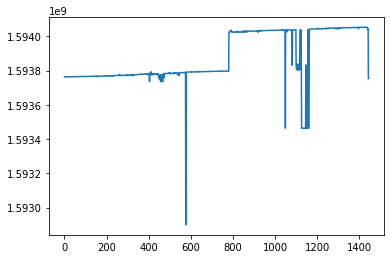

In [65]:
plt.plot(torque1["Timestamp"].values.astype(np.int64) // 10 ** 9)

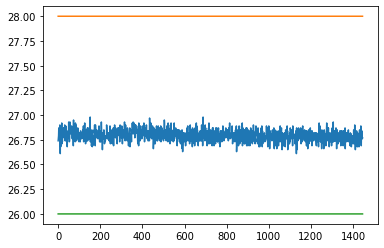

In [67]:
plt.figure()
plt.plot(torque1["TestValue"].values)
plt.plot(torque1["USL"].values)
plt.plot(torque1["LSL"].values)

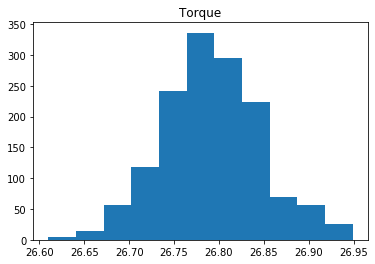

In [146]:
def draw_histogram(values, title):
    """
    Draws a histogram of a list of values.
    """
    min = values.min()
    max = values.max()

    bins = np.arange(min, max, (max - min) / 12)

    fig, ax = plt.subplots(1, 1)
    plt.title(title)
    ax.hist(values, bins=bins)

values = torque1["TestValue"].values
draw_histogram(values, "Torque")

In [160]:
def is_normal_distribution(values):
    if (values.shape[0] < 8):
        return False
    # skewness and kurtosis
    pvalue = skewtest(values).pvalue
    # kurtosis 
    kurt = kurtosis(values)

    if (values.min() == values.max()):
        return True

    if (pvalue < 0.05):
        return False

    if (np.abs(kurt) > 0.5):
        return False

    return True

In [142]:
is_normal_distribution(values)

True

In [118]:
def show_histogram_if_not_normal(values):
    if not is_normal_distribution(values):
        draw_histogram(values)

In [173]:
def transverse_timeseries(df):
    stations = df["Station"].unique()
    for station in stations:        
        print("Checking:", station)
        station_df = df[df["Station"] == station]
        checks = station_df["TextDescription"].unique()       
        if (checks.shape[0] > 1000):
            print("Skipping; too many tests: ", checks.shape[0])
            continue
        for check in checks:
            # extract values
            check_df = station_df[station_df["TextDescription"] == check]
            values = check_df["TestValue"].values
            if not is_normal_distribution(values):                         
                with open("not_normal.log", "a") as fo:
                    fo.write("Not normal distribution: " + station + " - " + check + "\n")
                print("Not normal distribution: ", check)
                #draw_histogram(values, station + " - " + check)
            else:
                with open("normal.log", "a") as fo:
                    fo.write("Normal distribution: " + station + " - " + check + "\n")
                print("Normal distribution:", check)    

In [172]:
transverse_timeseries(df)

on Knock 1
Not normal distribution:  144 - 070_3 calculate area deviation Knock 2
Not normal distribution:  145 - 070_4 calculate area deviation Knock 3
Normal distribution: 146 - 1102_1 Measure_Voltage_ADC__request
Normal distribution: 147 - 1102_2 Measure_voltage_ADC_receive
Normal distribution: 148 - 1102_3 Check_Get_Limits
Normal distribution: 149 - 1102_4 Check_M_IGN_ADC:0
Normal distribution: 150 - 1102_5 Check_Get_Limits
Normal distribution: 151 - 1102_4 Check_M_VBAT_ADC:0
Normal distribution: 152 - 1109_0 Check_Get_Limits
Normal distribution: 153 - 1109_1 Measure_voltage_ATIC255_1_request
Normal distribution: 154 - 1109_2 Measure_voltage_ATIC255_1_receive
Normal distribution: 155 - 1109_3 Check_VZ_Voltages_ATIC255_1 :0
Normal distribution: 156 - 1109_3 Check_VZ_Voltages_ATIC255_1 :1
Normal distribution: 157 - 1109_3_2 Check_VZ_Voltages_ATIC255_1 :0
Normal distribution: 158 - 1109_3_2 Check_VZ_Voltages_ATIC255_1 :1
Normal distribution: 159 - 1109_3_2 Check_VZ_Voltages_ATIC255_1 